In [1]:
! pip install Beautiful soup

    Running setup.py install for soup: started
    Running setup.py install for soup: finished with status 'done'


In [7]:
! pip install requests

In [8]:
!pip install bs4

    Running setup.py install for bs4: started
    Running setup.py install for bs4: finished with status 'done'


In [1]:
import requests as req

In [244]:
from bs4 import BeautifulSoup
import pandas as pd

In [227]:
url = req.get("https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off")

In [228]:
url

<Response [200]>

In [229]:
soup = BeautifulSoup(url.text,'html.parser')

In [230]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<link href="https://rukminim1.flixcart.com" rel="dns-prefetch"/>
<link href="https://img1a.flixcart.com" rel="dns-prefetch"/>
<link href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.0bf2d8.css" rel="stylesheet"/>
<link as="image" href="//img1a.flixcart.com/www/linchpin/fk-cp-zion/img/fk-logo_9fddff.png" rel="preload"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="102988293558" property="fb:page_id"/>
<meta content="658873552,624500995,100000233612389" property="fb:admins"/>
<meta content="noodp" name="robots"/>
<link href="https://img1a.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon">
<link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
<meta content="website" property="og:type"/>
<meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
<!-- Appple Tou

In [268]:
brand =[]
prices = []
rating=[]
Ram=[]
Rom=[]
expandableupto=[]
display=[]

In [269]:
for a in soup.findAll('a',href=True,attrs={'class':"_31qSD5"}):
    brandname = a.find('div',attrs={'class':'_3wU53n'})
    price = a.find('div',attrs={'class':'_1vC4OE _2rQ-NK'})
    Rating=a.find('span',attrs={'class':'_38sUEc'})
    RAM=a.find('li',class_="tVe95H")
    ROM=a.find('li',class_="tVe95H")
    Expandableupto=a.find('li',class_="tVe95H")
    Display=a.find('li',class_="tVe95H")
    brand.append(brandname.text)
    prices.append(price.text)
    rating.append(Rating.text)
    Ram.append(RAM.text[0:9])
    Rom.append(ROM.text[10:21])           
    expandableupto.append(Expandableupto.text[22:45])
    display.append(Display.text[45:60])

In [271]:
df = pd.DataFrame({'Brandname':brand,'Price':prices,'RAM':Ram,'ROM':Rom,
                  'Expandableupto':expandableupto,'Ratings & Reviews':rating,
                  'Full HD Display':display})
df

,Brandname,Price,RAM,ROM,Expandableupto,Ratings & Reviews,Full HD Display
0,"POCO X2 (Atlantis Blue, 64 GB)","₹15,999",6 GB RAM,64 GB ROM,Expandable Upto 512 GB,"19,629 Ratings & 2,621 Reviews",
1,"Realme C3 (Frozen Blue, 64 GB)","₹7,999",4 GB RAM,64 GB ROM,Expandable Upto 256 GB,"20,211 Ratings & 2,071 Reviews",
2,"POCO X2 (Atlantis Blue, 128 GB)","₹16,999",6 GB RAM,128 GB ROM,| Expandable Upto 512 G,"19,629 Ratings & 2,621 Reviews",B
3,Blackbear B5 Nex,₹799,64 MB RAM,| 64 MB ROM,| Expandable Upto 16 GB,53 Ratings & 3 Reviews,
4,"Redmi 8A (Midnight Black, 32 GB)","₹6,499",2 GB RAM,32 GB ROM,Expandable Upto 512 GB,"1,11,519 Ratings & 8,584 Reviews",
5,"Realme C2 (Diamond Ruby, 32 GB)","₹6,999",3 GB RAM,32 GB ROM,Expandable Upto 256 GB,"1,07,347 Ratings & 8,660 Reviews",
6,"POCO X2 (Phoenix Red, 128 GB)","₹16,999",6 GB RAM,128 GB ROM,| Expandable Upto 512 G,"19,629 Ratings & 2,621 Reviews",B
7,"Redmi Note 7 Pro (Space Black, 64 GB)","₹9,999",4 GB RAM,64 GB ROM,Expandable Upto 256 GB,"7,72,479 Ratings & 68,359 Reviews",
8,"Redmi 8A (Ocean Blue, 32 GB)","₹6,999",3 GB RAM,32 GB ROM,Expandable Upto 512 GB,"1,02,208 Ratings & 8,408 Reviews",
9,"Realme C2 (Diamond Blue, 32 GB)","₹6,999",3 GB RAM,32 GB ROM,Expandable Upto 256 GB,"1,07,347 Ratings & 8,660 Reviews",


In [303]:
play=[]

In [323]:
for b in soup.findAll("a",href=True,attrs={'class':'_31qSD5'}):
    Hd=a.find('div',attrs={'class':'_3ULzGw'})
    play.append(Hd.text[45:120])

In [406]:
df1=pd.DataFrame({'Display':play})
df1
a =df1.head(10)
a

,Display
0,16.13 cm (6.35
1,16.13 cm (6.35
2,16.13 cm (6.35
3,16.13 cm (6.35
4,16.13 cm (6.35
5,16.13 cm (6.35
6,16.13 cm (6.35
7,16.13 cm (6.35
8,16.13 cm (6.35
9,16.13 cm (6.35


In [409]:
hd = []
for dis in a['Display']:
    short_form =''
    for initial in dis.split():
        short_form=short_form+initial[0:5]
    hd.append(short_form)

TypeError: string indices must be integers

In [408]:
hd

['16.13cm(6.35',
 '16.13cm(6.35',
 '16.13cm(6.35',
 '16.13cm(6.35',
 '16.13cm(6.35',
 '16.13cm(6.35',
 '16.13cm(6.35',
 '16.13cm(6.35',
 '16.13cm(6.35',
 '16.13cm(6.35']

In [340]:
df.shape

(24, 7)

In [63]:
x= df['brandname']
y= df['price']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text xticklabel objects>)

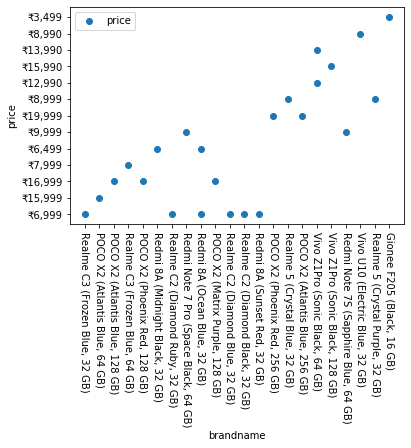

In [74]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('brandname')
plt.ylabel('price')
plt.legend(['price','brandname'])
plt.xticks(rotation=270)

In [76]:
a=df.to_csv("filpkart.csv")
a

In [457]:
def display(hd):
    for i in hd:
        print(i*10)
a=display(["16.13cm(6.35inch)HD,\n"])
a

16.13cm(6.35inch)HD,
16.13cm(6.35inch)HD,
16.13cm(6.35inch)HD,
16.13cm(6.35inch)HD,
16.13cm(6.35inch)HD,
16.13cm(6.35inch)HD,
16.13cm(6.35inch)HD,
16.13cm(6.35inch)HD,
16.13cm(6.35inch)HD,
16.13cm(6.35inch)HD,



In [458]:
a